# Algorithms basics

**Table of contents**<a id='toc0_'></a>    
- 1. [Algorithms - what are they even?](#toc1_)    
  - 1.1. [Simple example: $\max\{ \ell\}$](#toc1_1_)    
- 2. [Algorithmic complexity](#toc2_)    
  - 2.1. [Example of a complexity calculation](#toc2_1_)    
- 3. [Multiplication and Karatsuba's algorithm](#toc3_)    
  - 3.1. [Demonstration](#toc3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Now we're getting more into the 'numerical methods' part of the course!   

Today, we will delve into the following:
* how to write **pseudo code** 
* **computational complexity** (big-O notion). 

This notebook will set you up to understand the **searching** and **sorting** algorithms. These types of algorithms are at the heart of computer science.

In [1]:
from IPython.display import Image

## 1. <a id='toc1_'></a>[Algorithms - what are they even?](#toc0_)

**Technically:** An unambigious specification of how to solve a class of problems.

**In a nut shell:** *An algo is a recipe.*  
Even a simple cooking recipe is an algorithm..

    1. Preheat the oven
    2. Mix flour, sugar and eggs
    3. Pour into a baking pan
    etc.

**Properties of a successful algorithm:**

1. Unambigious termination criteria
1. Pre-defined inputs
2. Pre-defined ouputs
3. Guaranteed finite runtime
4. Correct result

### 1.1. <a id='toc1_1_'></a>[Simple example: $\max\{ \ell\}$](#toc0_)

**Problem:** Given a list of positive numbers, return the largest number in the list.

**Inputs:** A list `L` of positive numbers.

**Outputs:** A number.

**Algorithm:** `find_max()`
    
  1. Set `maxL` to 0.
  2. For each `x` in the list `L`, compare it to `maxL`. If `x` is larger, set `maxL` to `x`.
  3. `maxL` is now set to the largest number in the list.
  
> **Note:** The above is called **pseudo-code** (understandable across programming languages).

**Implementation** in Python:

In [11]:
def find_max(L):
    maxL = 0
    for x in L:
        if x > maxL:
            maxL = x
    return maxL

In [13]:
L = [12,3,4,4,-123,4534,1223,4]
find_max(L)

4534

**Question:** An error *might* occur if `L` is not restricted to contain strictly positive numbers. What could happen?

**Bonus info:** Python, and other modern languages, actually tries to **predict** the result of an `if` statement before it is reached and prepares the following set of instructions. This is called *branch prediction* and is a major source of computational improvement. If you have a lot of `if-statements` that are not predictable, eg. because of randomized data, it may be a drag on computation time. 

## 2. <a id='toc2_'></a>[Algorithmic complexity](#toc0_)

Algorithms can be characterized by the number of operations needed to perform them. This is called their complexity. 

The `find_max()` algorithm has `n = len(L)` operations each making a *comparison* (`x > max`) and (perhaps) an *assignment* (`max = x`).

The number of operations increase linearily in the length of the input list (the order of the function is linear).

**Mathematically** we say that `find_max()` has linear complexity, $O(n)$ where $n$ is the input size (length of L).

Other **common levels of complexity** are:

1. Constant, $O(1)$ (i.e. independent of input size)
2. Logarithmic, $O(\log n)$
3. Linear, $O(n)$
4. Log-linear, $O(n \log n)$
5. Quadratic, $O(n^2)$
6. Cubic, $O(n^3)$
7. Exponential, $O(2^n)$ (**curse of dimensionality**)

If the performance of an algorithm **depends on the exact values of the input** we differentiate between

1. **Best** case
2. **Average** case (across all possible inputs)
3. **Worst** case

Complexity is an **asymptotic** measure,

1. Only the number of operations matter (not their type or cost)
2. Only the highest order matter

<img src="bigO.png" alt="bigO" width=40% />

**In practice however:** 

* The cost of each operation matters for fixed input size.
* The amount and flow of **memory** matter for speed (cache vs. RAM vs. disc). 
* Therefore, it is **not guaranteed** that an algorithm of lower complexity executes faster than that of higher complexity for all cases.  
    Especially, there may be differences in the costs of memory allocation and deletion which are not counted into the measure of complexity.

### 2.1. <a id='toc2_1_'></a>[Example of a complexity calculation](#toc0_)

In [ ]:
def demo_algorithm(n):
    
    # a. 3 assignments
    a = 5
    b = 6
    c = 10
    
    # b. 3*n^2 multiplications and 3*n^2 assignments
    for i in range(n):
        for j in range(n):
            x = i * i
            y = j * j
            z = i * j
            
    # c. n multiplications, additions, and assignments
    #    + n multiplications and assignments
    for k in range(n):
        w = a*k + 45
        v = b*b
        
    # d. 1 assignment
    d = 33

The **total number of operations** are:  $T(n) = 3 + 6n^2 + 5n + 1 = 6n^2 + 5n + 4$

Notice: this is an exposition of operations. There are of course also operations involved in multiplication itself, which means that the number above is not indicative of the *total* number of operations that the computer must handle.  

**In big-O notation**: `demo_algorithm()` is $O(n^2)$, i.e. *quadratic complexity*

**$\large \color{purple}{Question}$:** What is the complexity of these two algoritms?


In [ ]:
def algorithm_a(n):
    s = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                s += 1

 
def algorithm_b(n):
    s = 0
    for i in range(n):
        s *= 2
    for j in range(n):
        s *= 2
    for k in range(n):
        s *= 2

All inbuilt python functions and methods have a level of complexity. <br>
You can checkout a [comprehensive table](https://wiki.python.org/moin/TimeComplexity) of Python operations' complexity. There is also some discussion [here](https://www.ics.uci.edu/~pattis/ICS-33/lectures/complexitypython.txt). <br>
If you wanna know more about complexity calculation, you can start with the pdf file in this folder

## 3. <a id='toc3_'></a>[Multiplication and Karatsuba's algorithm](#toc0_)

Ever wondered how Python multiplies two numbers? It actually depends on the size of those numbers! 

**Small numbers:** 3rd grade algorithm. **Large numbers:** Karatsuba's algorithm. 

### 3.1. <a id='toc3_1_'></a>[Demonstration](#toc0_)

Consider the multiplication $2275 \times 5013 = 11,404,575$

**3rd grade algorithm**  
Exemplified by the picture below.
The 3rd grade algorithm is $O(n^2)$, where $n$ is the number of digits in the shortest input argument. To see this, think of the multiplication part as nested for-loops throughout the 10s, 100s, 1000s etc. Then there is the addition part, which is also $O(n^2)$.


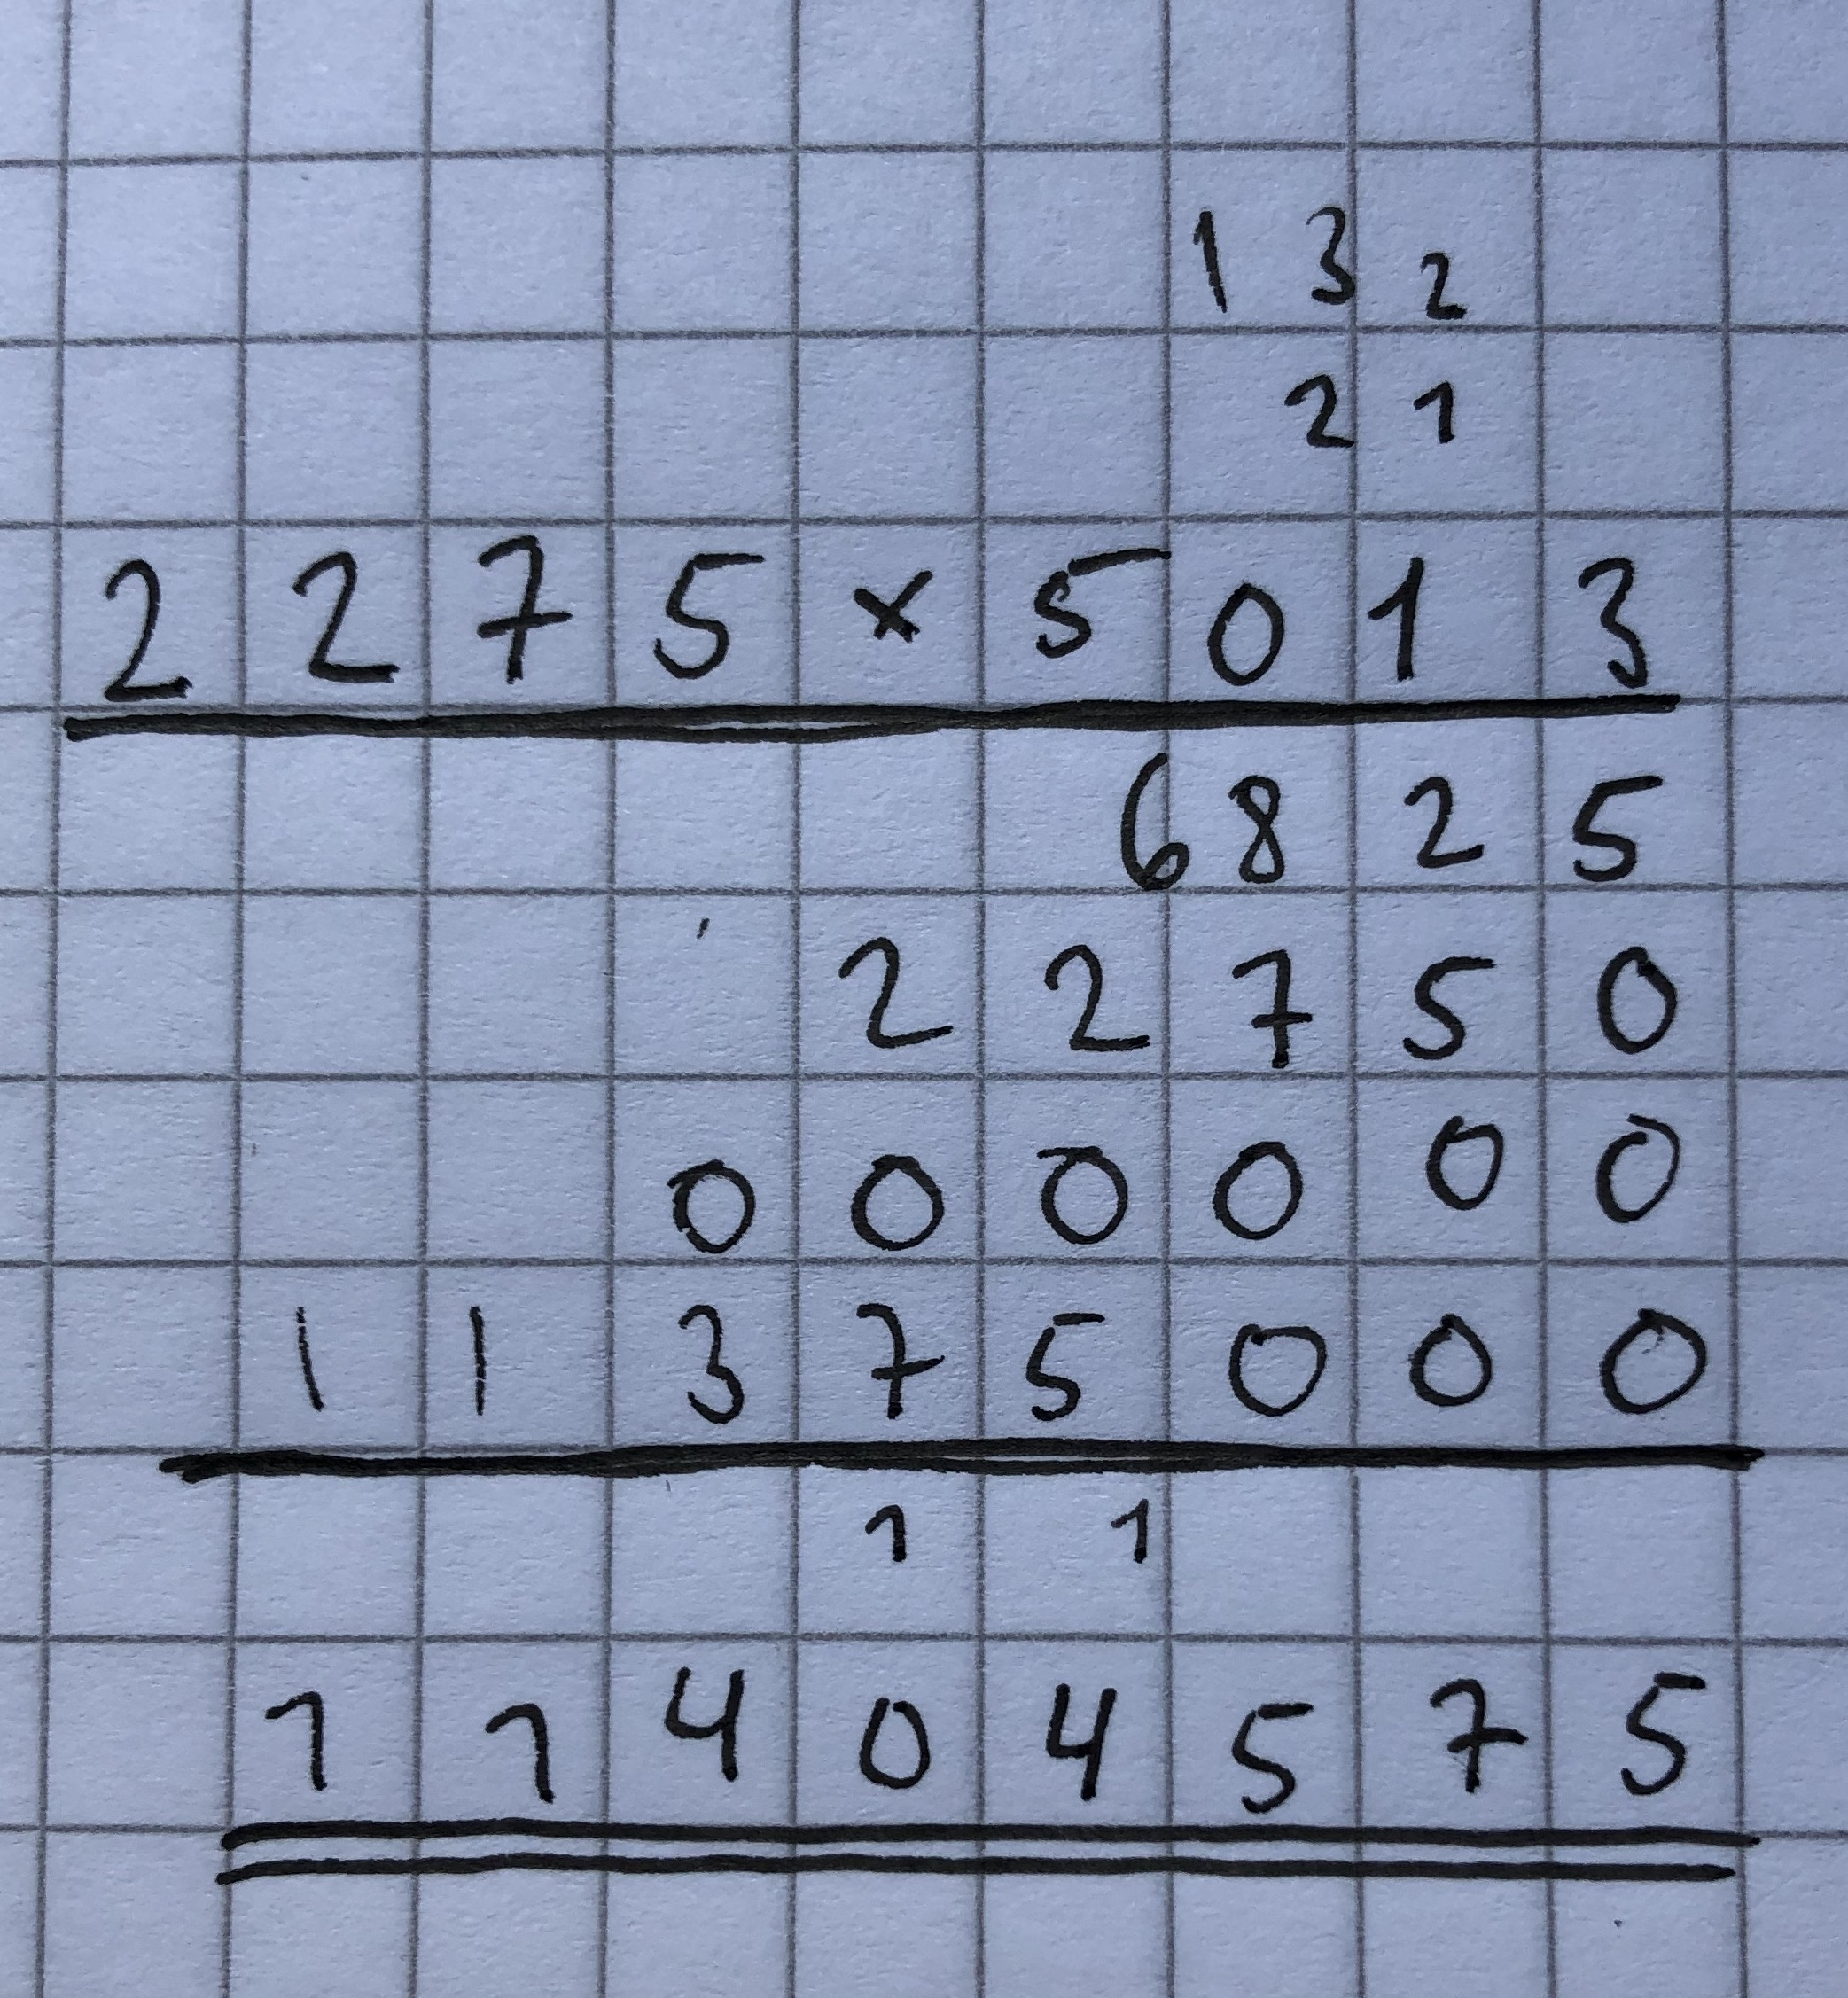

In [14]:
Image(filename = "ThirdGradeMultiplication.jpg", width = 230, height = 230)

**Karatsuba's algorithm**

It is not super intuitive what goes on here. But basically, it's splitting the numbers to be multiplied into multiples of 10s and then performs operations on those splits. 

The algorithm is only $O(n^{log_3})$, so better than 3rd grade algorithm for large $n$.

**Some preparation:**  

$x = 2275$, $y = 5013$

Note the identities:  
$x = 22 \times 10^2 + 75$  
$y = 50 \times 10^2 + 13$

We denote:  
$x_a = 22,  \: x_b = 75$  
$y_a = 50,  \: y_b = 13$

such that we have:

$x = x_a \times 10^2 + x_b$  
$y = y_a \times 10^2 + y_b$

**The algorithm**

*First compute:*

$A = x_a \times y_a$  
$B = x_b \times y_b$  
$C = (x_a + x_b) \times (y_a +y_b) - A - B$

*Then we have that*  

$x \times y = A \times 10^4 + C\times 10^2 + B$

See [here](https://en.wikipedia.org/wiki/Karatsuba_algorithm) for the derivation.

**In numbers**

$A = 22 \times 50 = 1100$  
$B = 75 \times 13 = 975$  
$C = (22 + 75)(50 + 13) - 1100 - 975   = 4036$  

$x \times y = 1100 \times 10^4 + 4036\times 10^2 + 975 = 11,404,575$